# CSE382 - Data Mining and Business Intelligence
# Team 7
## Reda Mohsen Reda 18P5141
## Noor El-Din Talaat Ezzat 18P3826

### In this project we apply different classification (KNN - DT - SVM - Bayes) and clustering on a breast cancer dataset.

### Before making anything like feature selection and classification, firstly we start with basic data analysis. Lets look at features of data.

## Breast Cancer DataSet

## Read and Analyse Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
import matplotlib
import matplotlib.pyplot as plt
from pandas import DataFrame
import warnings 
warnings.filterwarnings(action= 'ignore')
%matplotlib inline

In [2]:
# read the dataset
df = pd.read_csv('Breast_Cancer.csv',index_col=[0])
df.head(6)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [3]:
# find if missing values is present
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
# get the dimensions of the dataset
df.shape

(569, 31)

In [5]:
# find the data types of the attributes
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

### Diagnosis is our class label

In [6]:
# feature names as a list
col = df.columns       # .columns gives columns names in data 
print(col)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
# y includes our labels and x includes our features
y = df.diagnosis                          # M or B 
list = ['diagnosis']
x = df.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


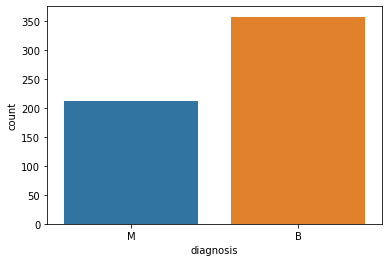

In [8]:
# get the distribution of the target variable
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

### We should know something like variance, standart deviation, number of sample (count) or max min values. These type of information helps to understand about what is going on data.

In [9]:
# concise summary of the data
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


 ### Therefore do we need standardization or normalization before visualization.

## Visualization

### we need to normalization or standirdization. Because differences between values of features are very high to observe on plot. For example , the area_mean feature's max value is 2500 and smoothness_mean features' max 0.16340. I plot features in 3 group and each group includes 10 features to observe better.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

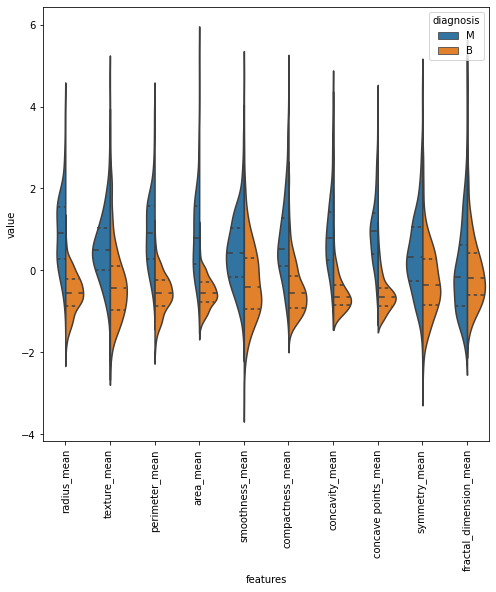

In [10]:
#First ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(8,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

### By visuaizing the plot above. For example, in texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

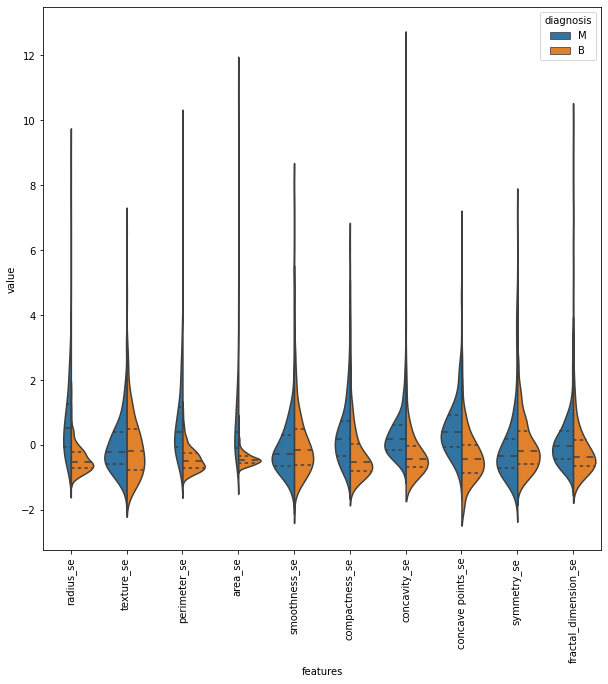

In [11]:
#Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

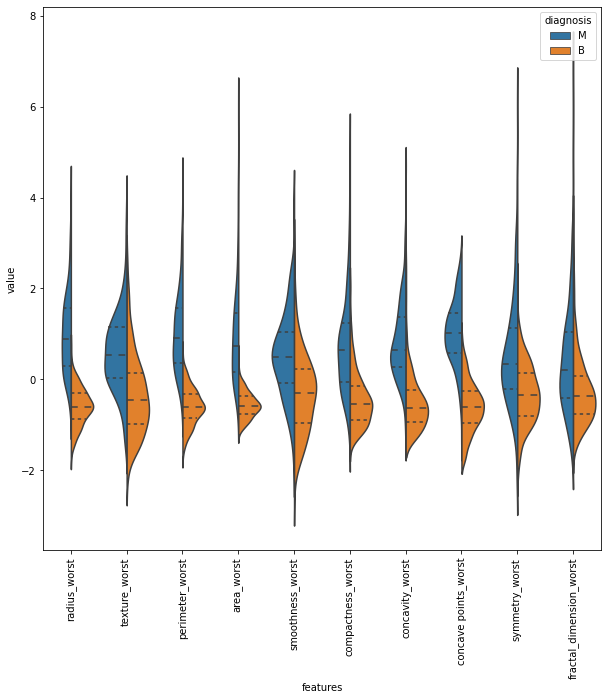

In [12]:
#Third ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

<AxesSubplot:>

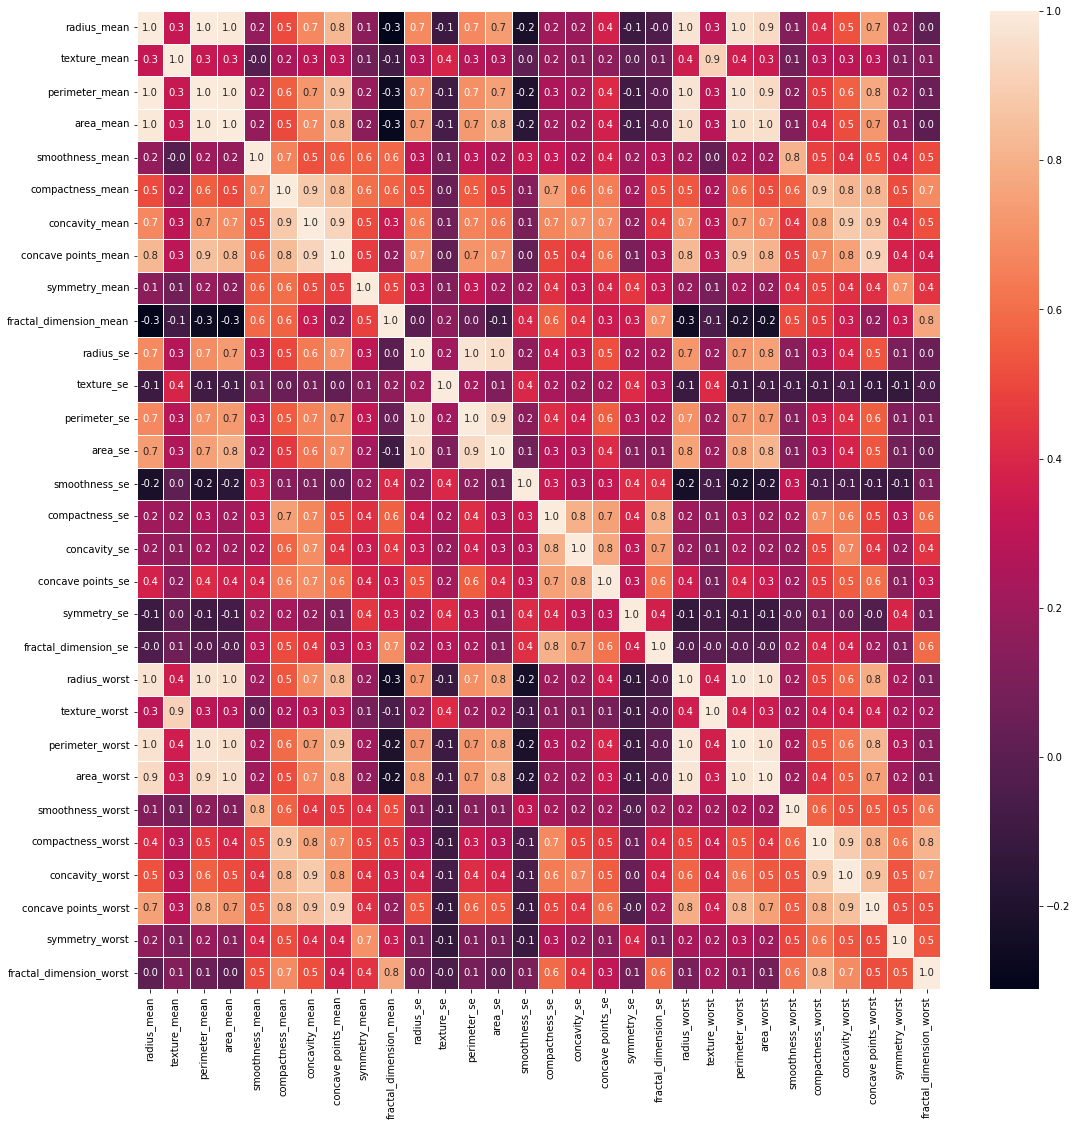

In [13]:
#correlation map to check the correlation
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other. Compactness_mean, concavity_mean and concave points_mean are correlated with each other. Apart from these, radius_se, perimeter_se and area_se are correlated. radius_worst, perimeter_worst and area_worst are correlated. Compactness_worst, concavity_worst and concave points_worst are correlated. Compactness_se, concavity_se and concave points_se are correlated. texture_mean and texture_worst are correlated. area_worst and area_mean are correlated.

In [14]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se',
              'concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,
842302,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
842517,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
84300903,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
84348301,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
84358402,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


### In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. In this method we need to choose how many features we will use. For example, choose k (number of features) = 2 and find best 2 features.

In [15]:
# split data train 70 % and test 30 %
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 2 features
select_feature = SelectKBest(chi2, k=2).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


### Best 2 features to classify is that area_mean, texture_mean. So lets se what happens if we use only these best scored 2 feature.

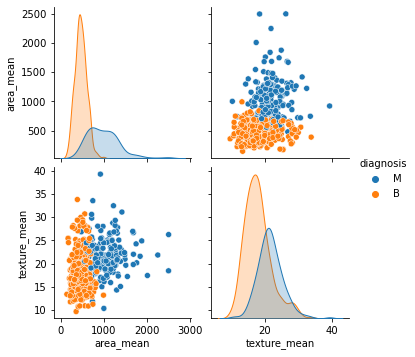

In [17]:
#Visualizing the Data
sns.pairplot(df,vars=['area_mean','texture_mean'],hue='diagnosis')

### No we need to split the data into training set and testing set to begin classification. But firsty we need to Convert the diagnosis value of M and B to a numerical value where M (Malignant) = 1 and B (Benign) = 0.

In [18]:
#Converting the diagnosis value of M and B to a numerical value where M (Malignant) = 1 and B (Benign) = 0
ctypes ={'M' : 1, 'B' : 0} 
df['diagnosis'] = df['diagnosis'].map(ctypes)

In [19]:
#Get New dataframe x,y with the 2 best features
x = DataFrame(df,columns=["area_mean",'texture_mean'])
y = df['diagnosis']

# Classification

In [20]:
#import importatnt libraries
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image 
from sklearn.model_selection import GridSearchCV
import pydotplus

### Splitting Data 70% training set and 30% testing set

In [21]:
#Split Data into training and testing set
xdat = x
ydat = y
xtr,xts,ytr,yts = train_test_split(xdat, ydat, test_size=0.3, random_state = 42)
print('Training set shape: ', xtr.shape, ytr.shape)
print('Testing set shape: ', xts.shape, yts.shape)

Training set shape:  (398, 2) (398,)
Testing set shape:  (171, 2) (171,)


## Modelling with K-Nearest Neighbors (Knn)

## Description

K- Nearest Neighbors or also known as K-NN is one of the simplest and strongest algorithm which belongs to the family of supervised machine learning algorithms which means we use labeled (Target Variable) dataset to predict the class of new data point. It is use for mostly in classification problems and as well as regression problems. KNN also called as the non-parametric, lazy learning algorithm.

It is commonly used for its easy of interpretation and low calculation time. The working flow of the algorithm is follow.

## Code

### First import knn libraries

In [22]:
from sklearn.neighbors import KNeighborsClassifier

### From the most important and effective parameter to knn algorithm is choosing k so will try to get the best k with the least error in classification.

The optimal number of neighbors is  3 


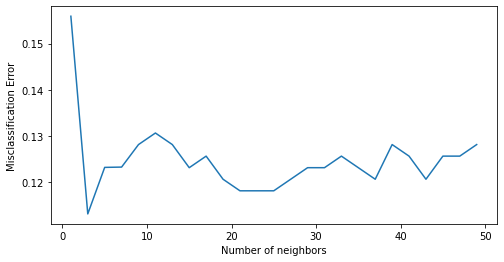

In [23]:
#To get the best k
neighbors = []
cv_scores = []
  
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, xtr, ytr, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

MSE = [1-xdat for xdat in cv_scores]
  
# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)
  
# plot misclassification error versus k
plt.figure(figsize = (8, 4))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

### After we get k=3, build the knn model classifier and get its accuracy score.

In [24]:
# Use the KNN classifier to fit data:
knn = KNeighborsClassifier(metric='euclidean',n_neighbors=3,weights='uniform')
knn.fit(xtr, ytr)
# Predict data with classifier: 
pred_y = knn.predict(xts)
#Print Accuracy_Score of the model
KnnAcc = accuracy_score(yts, pred_y)
print('Accuracy: %.3f' % KnnAcc)

Accuracy: 0.889


### Performance metrics (classification report).

In [25]:
#Classification Report
yts_score=knn.predict_proba(xts)
print(classification_report(yts, pred_y))
print('roc_auc_score: %.2f' % roc_auc_score(yts, yts_score[:,1]))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       108
           1       0.88      0.81      0.84        63

    accuracy                           0.89       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171

roc_auc_score: 0.91


### Plotting the confusion matrix

<AxesSubplot:>

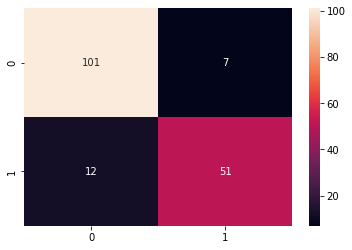

In [26]:
#Plot Confusion Matrix
cm = confusion_matrix(yts, pred_y)
sns.heatmap(cm, annot=True, fmt="d")

### Plotting ROC Curve

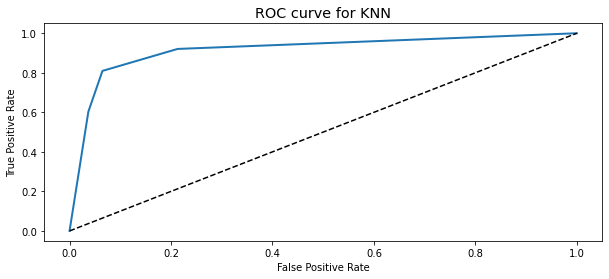

In [27]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(yts, yts_score[:,1])
plt.figure(figsize=(10,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Visualization

### Visualizing of the training set after knn classification and the decision boundary. Using mlxtend library. 

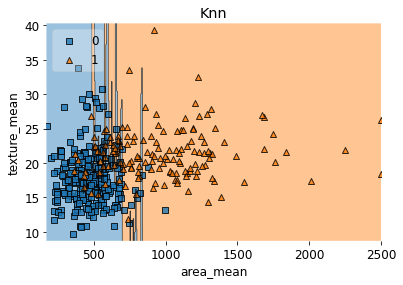

In [28]:
# Plot decision region of knn training set
plot_decision_regions(xtr.values, ytr.values, clf=knn, legend=2)
# Adding axes annotations
plt.xlabel('area_mean')
plt.ylabel('texture_mean')
plt.title('Knn')
plt.show()

### Visualizing of the testing set after knn classification and the decision boundary. Using mlxtend library. 

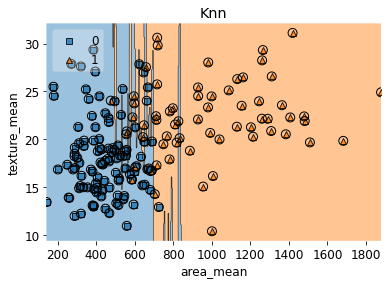

In [29]:
# Plot decision region of knn testing set
plot_decision_regions(xts.values, yts.values, clf=knn, legend=2,   X_highlight=xts.values)
# Adding axes annotations
plt.xlabel('area_mean')
plt.ylabel('texture_mean')
plt.title('Knn')
plt.show()

## Modelling with Decision Trees

## Description

A decision tree is a graph that uses a branching method to illustrate every possible output for a specific input. Decision trees can be drawn by hand or created with a graphics program or specialized software.
Informally, decision trees are useful for focusing discussion when a group must make a decision.

## Code

### Import decision tree library

In [30]:
from sklearn.tree import DecisionTreeClassifier 

### From the most important parameters in the decision trees is the max_depth, min_samples_leaf, and min_samples_split. So we need first to check them.

In [31]:
#hyperparameters Tuning
param = {
                "criterion":['gini', 'entropy'],
                "max_depth":range(1,5),
                "min_samples_split":range (1,10),
                "min_samples_leaf":range(1,5)
}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param, cv=10, verbose=1, n_jobs=-1)
grid.fit(xtr,ytr)
grid.best_estimator_

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=4)

### Here we get the parameter for the decision tree classifier which are(max_depth=4, min_samples_leaf=2).

### Build up classifier model and check its accuracy.

In [32]:
# Initialize classifier:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,min_samples_split=6, random_state=42)
# fit the model
DT.fit(xtr, ytr)
# Predict data with classifier: 
y_pred = DT.predict(xts)
#Print accuracy score
DtAcc = accuracy_score(yts, y_pred)
print('accuracy score: %.3f' %  DtAcc)

accuracy score: 0.901


### Performance metrics (classification report).

In [33]:
#Performance Classifiers
yts_score = DT.predict_proba(xts)
print('Precision: %.3f' % precision_score(yts, y_pred))
print('Recall: %.3f' % recall_score(yts, y_pred))
print('F1 Score: %.3f' % f1_score(yts, y_pred))
print('roc_auc_score: %.3f' % roc_auc_score(yts, yts_score[:,1]))

Precision: 0.979
Recall: 0.746
F1 Score: 0.847
roc_auc_score: 0.916


In [34]:
print(classification_report(yts, y_pred))
print('roc_auc_score: %.3f '% roc_auc_score(yts, yts_score[:,1]))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       108
           1       0.98      0.75      0.85        63

    accuracy                           0.90       171
   macro avg       0.92      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171

roc_auc_score: 0.916 


### ROC Curve

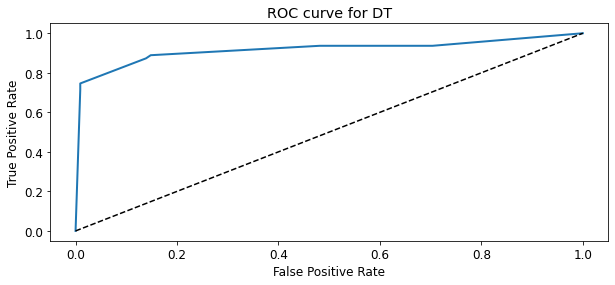

In [35]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(yts, yts_score[:,1])
plt.figure(figsize=(10,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for DT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Confusion Matrix

<AxesSubplot:>

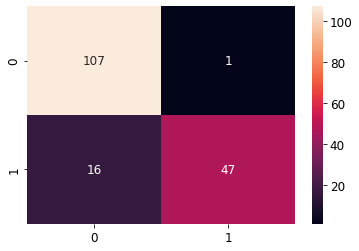

In [36]:
#Plot Confusion Matrix
cm = confusion_matrix(yts, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

### Visualization

### Tree Structure

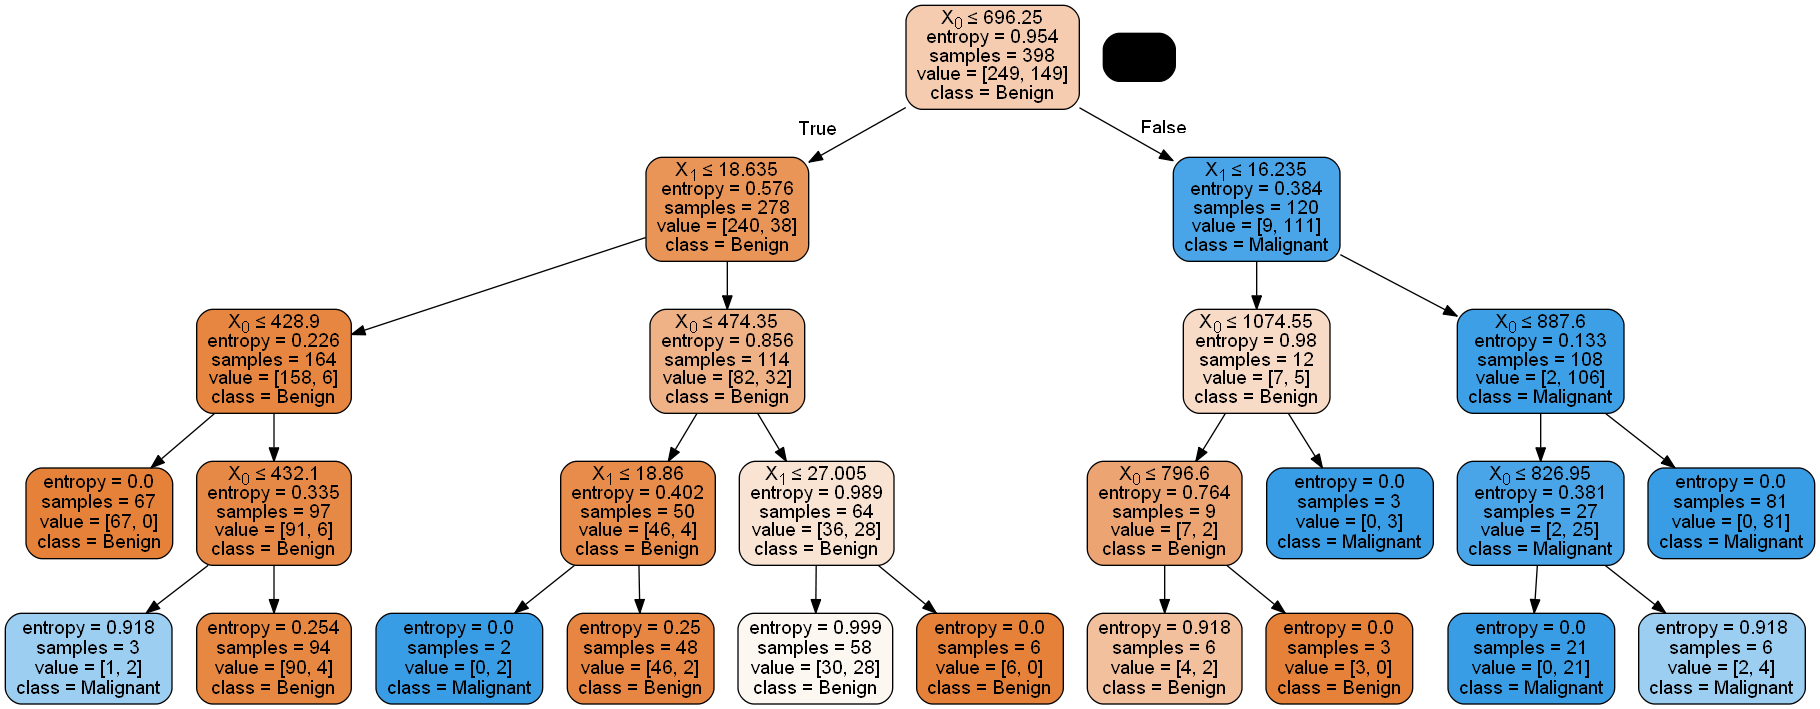

In [37]:
#Plotting Tree
dot_data = StringIO()
export_graphviz(DT, out_file = dot_data, rounded = True, filled = True, special_characters = True,
                class_names = ["Benign","Malignant"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("img.png")
Image(graph.create_png())

### Decision Boundaries Surface

### Visualizing the decision boundaries of the training set of decision tree model classifier.

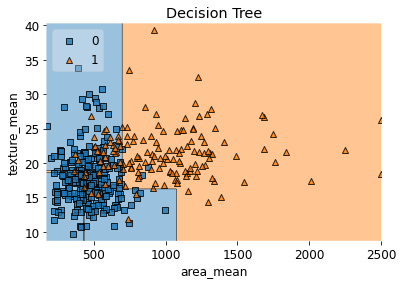

In [38]:
plot_decision_regions(xtr.values, ytr.values, clf=DT, legend=2)
# Adding axes annotations
plt.ylabel('texture_mean')
plt.xlabel('area_mean')
plt.title('Decision Tree')
plt.show()

### Visualizing the decision boundaries of the training set of decision tree model classifier.

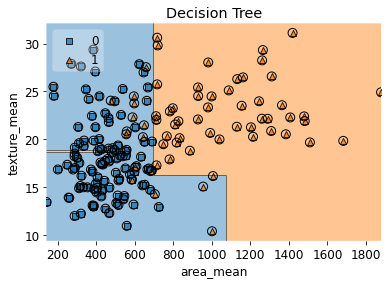

In [39]:
plot_decision_regions(xts.values, yts.values, clf=DT, legend=2,   X_highlight=xts.values)
# Adding axes annotations
plt.ylabel('texture_mean')
plt.xlabel('area_mean')
plt.title('Decision Tree')
plt.show()

## Naive Bayes:

### Description

A naive Bayes classifier is an algorithm that uses Bayes' theorem to classify objects. Naive Bayes classifiers assume strong, or naive, independence between attributes of data points. A naive Bayes classifier uses probability theory to classify data. Naive Bayes classifier algorithms make use of Bayes' theorem. The key insight of Bayes' theorem is that the probability of an event can be adjusted as new data is introduced. These classifiers are widely used for machine learning because they are simple to implement. Popular uses of naive Bayes classifiers include spam filters, text analysis and medical diagnosis. 



### Imports for the Naive Bayes:

In [40]:
from sklearn.naive_bayes import GaussianNB

### Split Data into training and testing set

In [41]:
x = DataFrame(df,columns=["area_mean",'texture_mean'])
y = df['diagnosis']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 10)
print('Training set shape: ', xtrain.shape, ytrain.shape)
print('Testing set shape: ', xtest.shape, ytest.shape)

Training set shape:  (398, 2) (398,)
Testing set shape:  (171, 2) (171,)


### Creating Classifier object

In [42]:
gnb = GaussianNB()

### Training the model:

In [43]:
gnb.fit(xtrain, ytrain)

GaussianNB()

### Predicting the Test data to check the accuracy

In [44]:
yprd = gnb.predict(xtest)

In [45]:
NbAcc = accuracy_score(ytest, yprd)
print('accuracy score: %.3f' %  NbAcc)

accuracy score: 0.848


### Creating the confusion matrix:

<AxesSubplot:>

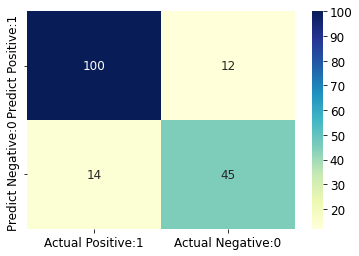

In [46]:
cm = confusion_matrix(ytest, yprd)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Plotting the actual data form data set and presenting the decision boundry which the Naive Classifier formed
    the x axis is the area_mean 
    the y axis it the testure_mean
    the squares is the first class 0 (M)
    the Triangle is the first class 1 (B)

Text(0, 0.5, 'texture_mean')

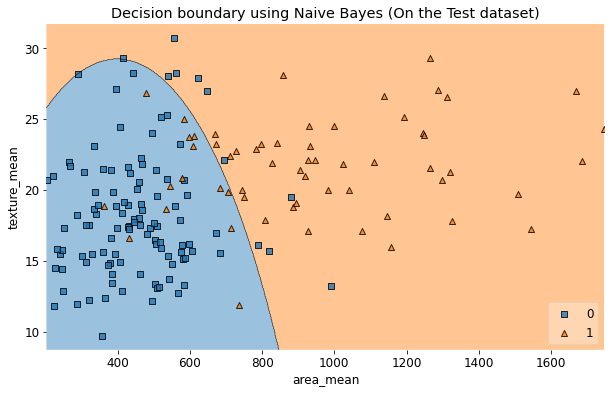

In [47]:
# Plotting the decision boundary
plt.figure(figsize=(10,6))
plot_decision_regions(xtest.values, ytest.values, clf = gnb, legend = 4)
plt.title("Decision boundary using Naive Bayes (On the Test dataset)")
plt.xlabel("area_mean")
plt.ylabel("texture_mean")

### Drawing the ROC curve:

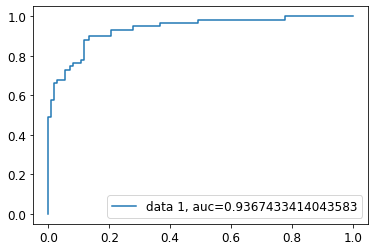

In [48]:
y_pred_proba = gnb.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Comparing between the test actual data and the predicted data of the Naive Bayes model


##### Ploting the data of the Test data

Text(0.5, 1.0, 'Diagnosis Predicted Plot')

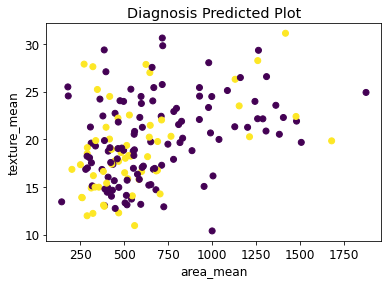

In [49]:
plt.scatter(x_test['area_mean'],x_test['texture_mean'],alpha =1,c=ytest)
plt.xlabel('area_mean')
plt.ylabel('texture_mean')
plt.title('Diagnosis Predicted Plot')

##### Ploting the data of the Predicted data

Text(0.5, 1.0, 'Diagnosis Predicted Plot')

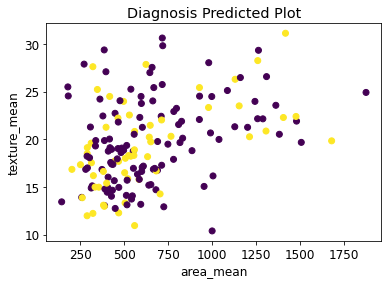

In [50]:
plt.scatter(x_test['area_mean'],x_test['texture_mean'],alpha =1,c=yprd)
plt.xlabel('area_mean')
plt.ylabel('texture_mean')
plt.title('Diagnosis Predicted Plot')

## SVM Model:

### Description

A support vector machine (SVM) is machine learning algorithm that analyzes data for classification and regression analysis. SVM is a supervised learning method that looks at data and sorts it into one of two categories. An SVM outputs a map of the sorted data with the margins between the two as far apart as possible. SVMs are used in text categorization, image classification, handwriting recognition and in the sciences.

### Imports for the SVM:

In [51]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

### Creating Classifier object and training the model on the training data set

In [52]:
svm = SVC(kernel='linear',probability=True)
svm.fit(xtrain, ytrain)

SVC(kernel='linear', probability=True)

### Prediction of the test data set of the data to check the accuracy of the model

In [53]:
yp = svm.predict(xtest)

### Predicting the Test data to check the accuracy

In [54]:
SvmAcc = accuracy_score(ytest, yp)
print('accuracy score: %.3f' %  SvmAcc)

accuracy score: 0.883


### Creating the Confusion matrix for the SVM model

<AxesSubplot:>

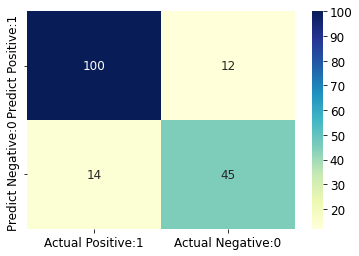

In [55]:

cm = confusion_matrix(ytest, yp)
m_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Printing the Model accurancy, percision, F1 score, and the Support

In [56]:
print(classification_report(ytest, yp))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       112
           1       0.83      0.83      0.83        59

    accuracy                           0.88       171
   macro avg       0.87      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171



### Drawing the Decision boundry for the SVM Model:

### Create a mesh of points to plot in
(the intervals of the model X,Y axis)

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on

    Returns
    -------
    xx, yy : ndarray

    ndarray : An array object represents a multidimensional, homogeneous array of fixed-size items.

In [57]:
def make_meshgrid(x, y, h=.02):

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
    return xx, yy



### Plot the decision boundaries for a classifier.
(indentifying the model range for the ploting)

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray


In [58]:
def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


Actual Ploting and calling of the mesh function and the plot

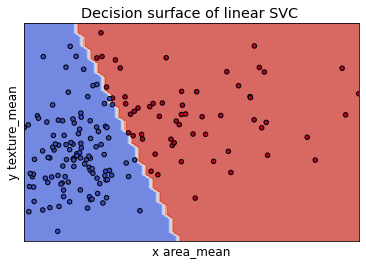

In [59]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
xx, yy = make_meshgrid(xtest['area_mean'], xtest['texture_mean'])

plot_contours(ax, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(xtest['area_mean'], xtest['texture_mean'], c=yp, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y texture_mean')
ax.set_xlabel('x area_mean')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

### Drawing of the ROC curve for the SVM model

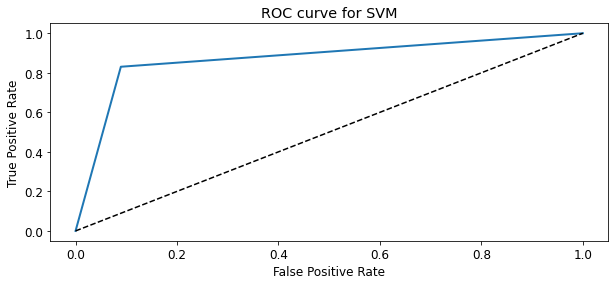

In [60]:
fpr, tpr, thresholds = roc_curve(ytest, yp)
plt.figure(figsize=(10,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Comparing Accuracy Between Models

0.8888888888888888
0.9005847953216374
0.847953216374269
0.8830409356725146


<AxesSubplot:>

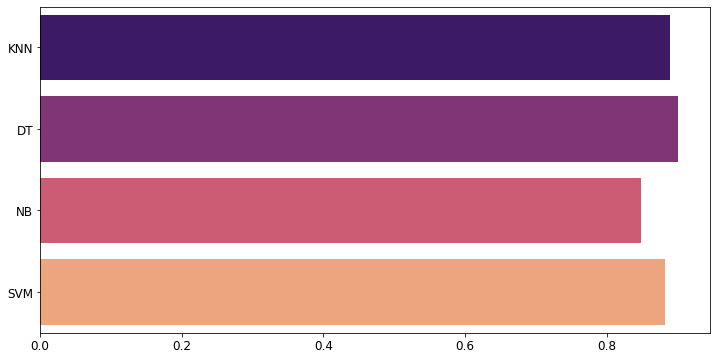

In [61]:
print(KnnAcc)
print(DtAcc)
print(NbAcc)
print(SvmAcc)
plt.figure(figsize=(12,6))
model_acc = [KnnAcc, DtAcc, NbAcc, SvmAcc]
model_name = ['KNN', 'DT', 'NB', 'SVM']
sns.barplot(x= model_acc, y=model_name, palette='magma')

# Clusterring

In [62]:
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
%matplotlib inline
from subprocess import check_output

In [63]:
## Scaling the dataset
data = df.copy()
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
#datas.columns = list(data.iloc[:,1:32].columns)

datas['diagnosis'] = data['diagnosis'].values

In [64]:
# Creating the high dimensional feature space X
data_drop = datas.drop('diagnosis',axis=1)
X = data_drop.values

In [65]:
#Creating a 2D visualization to visualize the clusters
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.803818
[t-SNE] KL divergence after 1850 iterations: 0.887652


## Modelling with K-Means Clusterring

## Description

### k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids.

## Code

In [66]:
from sklearn.cluster import KMeans
X1 = X
Y1 = Y
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
              verbose=0, random_state=None, copy_x=True, algorithm='auto'
             )
kY1 = kmns.fit_predict(X1)

## Virtualization

Text(0.5, 1.0, 'Actual clusters')

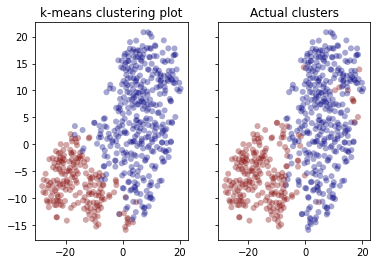

In [67]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y1[:,0],Y1[:,1],  c=kY1, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y1[:,0],Y1[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')